In [21]:
from importlib import reload
from pyfvtool import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root
from tqdm import tqdm

import sys
sys.path.append('..')
from pymadreq import *
import pymadreq.coreflood as cf
import pymadreq.fractional_flow as ff
import pymadreq.IO as IO

reload(ff)
reload(cf)
reload(IO)

<module 'pymadreq.IO' from 'c:\\Users\\aaeft\\Documents\\GitHub\\PyMADREQ\\examples\\..\\pymadreq\\IO.py'>

## Reading input file and defining the domain

In [22]:
# read the input file
data = IO.read_json("../examples/sample.json")
rel_perm_ww, rel_perm_ow, pc_ww, pc_ow = IO.read_transport_functions(data)
core_plug = IO.read_core_properties(data)
fluids = IO.read_fluids(data)
IC = IO.read_initial_conditions(data) # initial conditions
BC = IO.createFloodingCondition(data["BC"]) # boundary conditions
numerical_params = IO.read_numerical_settings(data)
m = IO.read_flooding_domain(data)

In [40]:
numerical_params.simulation_time = 500
numerical_params.time_step = 1.0
cf_1d = cf.Imbibition1D(
    rel_perm_ww, pc_ww, core_plug, fluids, IC, BC, numerical_params, Nx=50, Nx_free=50
)

In [41]:
t, R, sw_border = cf_1d.simulate_with_pc()

  0%|          | 0/500 [00:00<?, ?it/s]

1055.292794917255it [00:12, 86.53it/s]                           


0.25

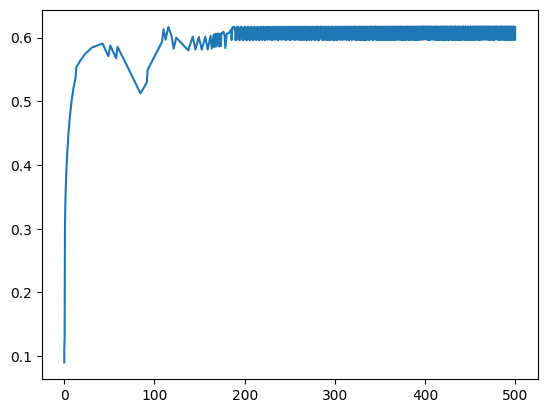

In [42]:
plt.plot(t, sw_border)
pc_ow.sw_pc0

# Learnings
The boundary condition will quickly reach a saturation at which capillary pressure is zero. Therefore, it is not a bad assumption for simulations. However, here we have a 1D counter-current flow. What if the flow is not counter-current?

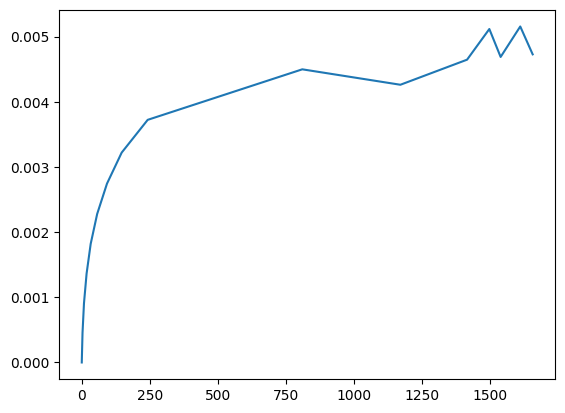

In [26]:
plt.plot(t, R)
cf_1d.final_sw

0.6

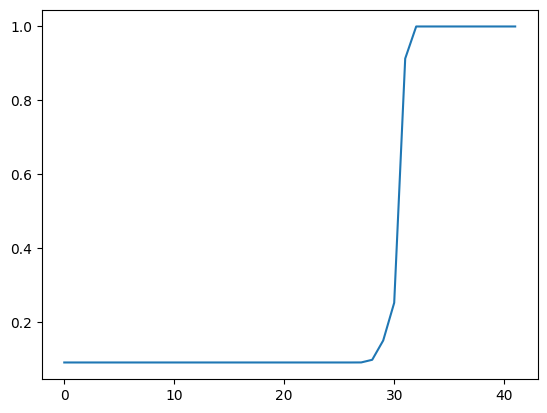

In [27]:
plt.plot(cf_1d.final_sw.value)
pc_ww.sw_pc0

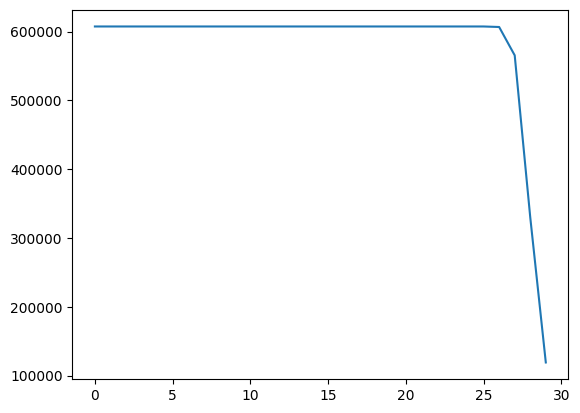

In [28]:
plt.plot(pc_ww.pc_imb(cf_1d.final_sw.value[1:-11]))

In [29]:
nx = 5
ny = 3
m = createMesh1D(nx+ny, 1.0)
c = createCellVariable(m, np.hstack([np.ones(nx), np.zeros(ny)]))
c_face = arithmeticMean(c)
c_face.xvalue[nx:-1], c_face.xvalue[nx+1]

(array([0.5, 0. , 0. ]), 0.0)

In [30]:
c_face.xvalue

array([1. , 1. , 1. , 1. , 1. , 0.5, 0. , 0. , 0. ])